In [1]:
import numpy as np
import matplotlib.pyplot as plt

def MultistepMethod(y0, t0, tf, h, f, usrinput = None):
    if usrinput is None:
        print("\n 1. Euler. \n 2. AB2. \n 3. AB3. \n")
        usrinput = int(input("Elija qué método desea usar: "))
        
    n = int((tf-t0)/h)
    rng = np.linspace(t0, tf, n+1)
    y_pred = 0
    y_values = np.zeros(n + 1)
    y_values[0] = y0

    m = usrinput

    for i in range(m):
        y_values[i + 1] = y_values[i] + h*f(rng[i], y_values[i])
        
    if usrinput == 1:
        for j in range(n):
            y_pred = y_values[j] + (h * f(rng[j], y_values[j]))
            y_values[j + 1] = y_values[j] + (h * f(rng[j + 1], y_pred))
        
    elif usrinput == 2:
        for j in range(m, n):
            y_pred = y_values[j] + h * (3*f(rng[j], y_values[j]) - f(rng[j - 1], y_values[j - 1]))
            y_values[j + 1] = y_values[j] + (h/12) * (5*f(rng[j + 1], y_pred) + 8*f(rng[j], y_values[j] - f(rng[j - 1], y_values[j - 1])))
   
    elif usrinput == 3:
        for j in range(m, n):
            y_pred = y_values[j] + (h/12) * (23*f(rng[j], y_values[j]) - 16*f(rng[j - 1], y_values[j - 1]) + 5*f(rng[j - 2], y_values[j - 2]))
            y_values[j + 1] = y_values[j] + (h/24) * (9*f(rng[j + 1], y_pred) + 19*f(rng[j], y_values[j]) - 5*f(rng[j - 1], y_values[j - 1]) + f(rng[j - 2], y_values[j - 2]))
    
    else:
        print("ELija correctamente.")
        return None
    return rng, y_values, usrinput



 1. Euler. 
 2. AB2. 
 3. AB3. 



Elija qué método desea usar:  1


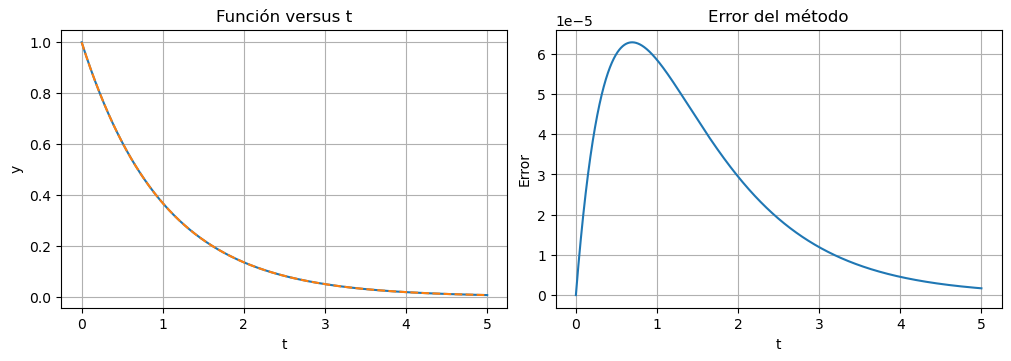

In [5]:
# y' + 2y - exp(-t) = 0
f = lambda t, y: -2*y + np.exp(-t)
t0 = 0
tf = 5
y0 = 1
h = 1e-3

t_v, y_values, m = MultistepMethod(y0, t0, tf, h, f)
t_m, y_values_m, temp = MultistepMethod(y0, t0, tf, h/2, f, m)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, y_values)
ax[0].plot(t_m, y_values_m, ls = "--")
ax[0].set_title("Función versus t")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")
ax[0].grid()

y_interpolate = y_values_m[::2]
error = np.abs(y_values - y_interpolate)

ax[1].plot(t_v, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[1].grid()

plt.show()



 1. Euler. 
 2. AB2. 
 3. AB3. 



Elija qué método desea usar:  1


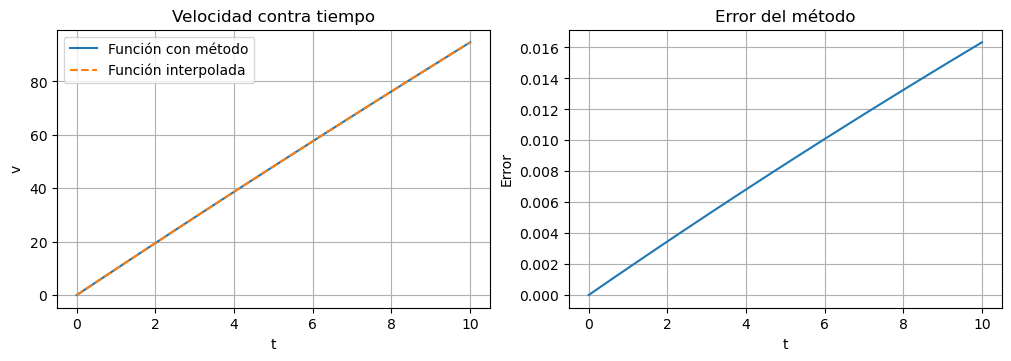

In [3]:
## Primer ejercicio - Resistencia de un cuerpo en función de su velocidad
f = lambda t, v: g - (c/m) * v
g = 9.81
c = 0.5
m = 70
t0 = 0
tf = 10
v0 = 0
h = 1e-1

t, y_values, usrinput = MultistepMethod(v0, t0, tf, h, f)
t_m, y_values_m, usrinput = MultistepMethod(v0, t0, tf, h/2, f, usrinput)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t, y_values)
ax[0].plot(t_m, y_values_m, ls = "--")
ax[0].legend(["Función con método", "Función interpolada"])
ax[0].set_title("Velocidad contra tiempo")
ax[0].set_xlabel("t")
ax[0].set_ylabel("v")

y_interpolate = y_values_m[::2]
error = np.abs(y_values - y_interpolate)

ax[1].plot(t, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[0].grid()

ax[1].grid()
plt.show()


 1. Euler. 
 2. AB2. 
 3. AB3. 



Elija qué método desea usar:  1


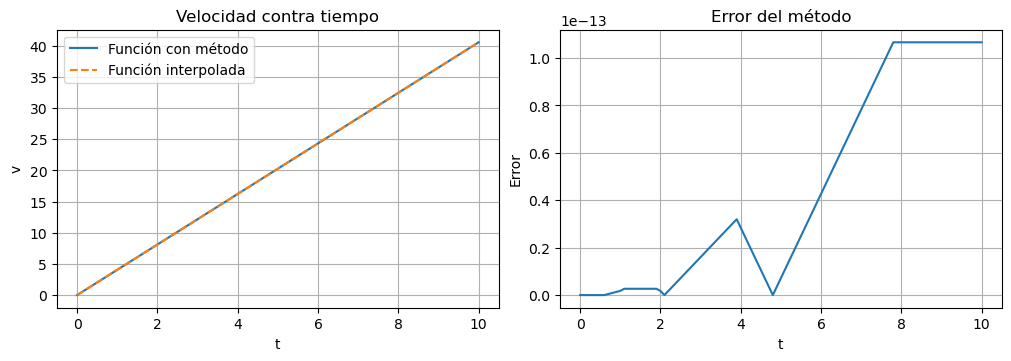

In [4]:
# Segundo ejercicio - Plano Inclinado a 30°

f = lambda t, v: g * (np.sin(np.deg2rad(theta)) - (mu * np.cos(np.deg2rad(theta))))
g = 9.81
theta = 30
mu = 0.1
t0 = 0
tf = 10
v0 = 0
h = 1e-1

t, y_values, usrinput = MultistepMethod(v0, t0, tf, h, f)
t_m, y_values_m, usrinput = MultistepMethod(v0, t0, tf, h/2, f, usrinput)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t, y_values)
ax[0].plot(t_m, y_values_m, ls = "--")
ax[0].legend(["Función con método", "Función interpolada"])
ax[0].set_title("Velocidad contra tiempo")
ax[0].set_xlabel("t")
ax[0].set_ylabel("v")

y_interpolate = y_values_m[::2]
error = np.abs(y_values - y_interpolate)

ax[1].plot(t, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[0].grid()

ax[1].grid()
plt.show()